In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("activities.csv")

df_runs = df[df['Activity Type'] == 'Laufen'].copy()

df_runs['Begin Timestamp'] = pd.to_datetime(df_runs['Begin Timestamp (Raw Milliseconds)'], unit='ms')
df_runs['hours'] = df_runs['Begin Timestamp'].dt.hour
df_runs['month'] = df_runs['Begin Timestamp'].dt.month
df_runs['weekday'] = df_runs['Begin Timestamp'].dt.day_of_week

df_runs['moving_time'] = df_runs['Moving Duration (Raw Seconds)']

df_runs['distance'] = df_runs['Distance'].str.replace(' Kilometer', '').str.replace(',', '.').astype(float) * 1000

df_runs['total_elevation_gain'] = df_runs['Elevation Gain'].str.replace(' Meter', '').astype(float)

df_runs['elev_high'] = df_runs['Max. Elevation'].str.replace(' Meter', '').astype(float)

df_runs['elev_low'] = df_runs['Min. Elevation'].str.replace(' Meter', '').astype(float)

df_runs['max_heart_rate'] = df_runs['Max. Heart Rate (bpm)']

df_runs['average_heart_rate'] = df_runs['Average Heart Rate (bpm)']

df_runs['temperature'] = df_runs['Temperature (Raw)']

df_runs['wind_speed'] = df_runs['Wind Speed (Raw)']

final_columns = [
    'moving_time',
    'distance', 
    'total_elevation_gain',
    'elev_high',
    'elev_low',
    'hours',
    'month',
    'weekday',
    'max_heart_rate',
    'average_heart_rate',
    'temperature',
    'wind_speed'
]

df_clean = df_runs[final_columns].dropna()

target_cols = [
    'moving_time',
]
Y = df_clean[target_cols]

feature_cols = [
    'distance',
    'total_elevation_gain',
    'elev_high',
    'elev_low',
    'hours',
    'month',
    'weekday',
    'max_heart_rate',
    'average_heart_rate',
    'temperature',
    'wind_speed'
]
X = df_clean[feature_cols]

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"Traings-Set (X_train): {X_train.shape[0]} Einträge")
print(f"Test-Set (X_test): {X_test.shape[0]} Einträge")

Traings-Set (X_train): 68 Einträge
Test-Set (X_test): 18 Einträge


In [4]:
model = LinearRegression()

model.fit(X_train, Y_train)

print("Model erfolgreich trainiert")

Model erfolgreich trainiert


In [5]:
Y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(Y_test, Y_pred)

print(f"Modell-Genauigkeit (MAE): {mae:.2f} Sekunden")

Modell-Genauigkeit (MAE): 151.13 Sekunden


In [6]:
new_run_data = [[10000, 0, 250, 240, 10, 11, 5, 200.0, 183.7, 15, 7]]

new_run_df = pd.DataFrame(new_run_data, columns=feature_cols)

prediction_array = model.predict(new_run_df)

predicted_time_sec = prediction_array[0][0]
predicted_minutes = predicted_time_sec / 60

print(f"\n--- LAUF PROGNOSE ---")
print(f"Geschätzte Zeit für deinen 10km-Lauf: {predicted_minutes:.2f} Minuten")



--- LAUF PROGNOSE ---
Geschätzte Zeit für deinen 10km-Lauf: 49.52 Minuten


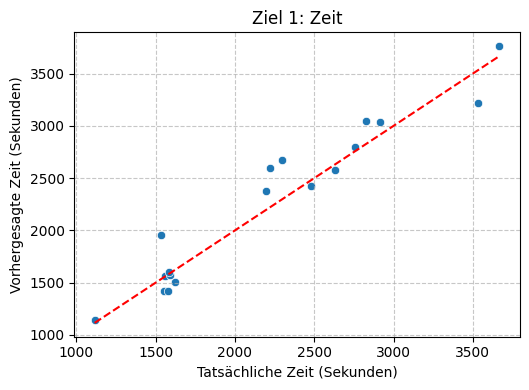

In [7]:
# Plot 1: Zeit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x=Y_test['moving_time'].values, y=Y_pred[:, 0])
plt.plot([Y_test['moving_time'].min(), Y_test['moving_time'].max()], [Y_test['moving_time'].min(), Y_test['moving_time'].max()], 'r--')
plt.xlabel("Tatsächliche Zeit (Sekunden)")
plt.ylabel("Vorhergesagte Zeit (Sekunden)")
plt.title("Ziel 1: Zeit")
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()